In [27]:
import glob
import pandas as pd
import pandas as pd
import matplotlib as plt
%matplotlib inline
import japanize_matplotlib
import datetime as dt

In [34]:
dt.date.today() - dt.timedelta(days=7)

datetime.date(2022, 4, 18)

In [7]:
# 検証する通貨のデータを選択
currency = 'USDJPY'
file = [i for i in glob.glob('../10minute_data/*.csv') if currency in i]
file

['../10minute_data\\USDJPY_1646060426491.csv',
 '../10minute_data\\USDJPY_1646157606367.csv',
 '../10minute_data\\USDJPY_1646200806640.csv',
 '../10minute_data\\USDJPY_1646244006833.csv',
 '../10minute_data\\USDJPY_1646287206373.csv',
 '../10minute_data\\USDJPY_1646330406948.csv',
 '../10minute_data\\USDJPY_1646373606715.csv',
 '../10minute_data\\USDJPY_1646416807538.csv',
 '../10minute_data\\USDJPY_1646460007660.csv',
 '../10minute_data\\USDJPY_1646503206654.csv',
 '../10minute_data\\USDJPY_1646546406242.csv',
 '../10minute_data\\USDJPY_1646589606548.csv',
 '../10minute_data\\USDJPY_1646632806648.csv',
 '../10minute_data\\USDJPY_1646676005606.csv',
 '../10minute_data\\USDJPY_1646719206348.csv',
 '../10minute_data\\USDJPY_1646762406256.csv',
 '../10minute_data\\USDJPY_1646805606866.csv',
 '../10minute_data\\USDJPY_1646892005096.csv',
 '../10minute_data\\USDJPY_1646935206067.csv',
 '../10minute_data\\USDJPY_1646978405521.csv',
 '../10minute_data\\USDJPY_1647021605377.csv',
 '../10minute

In [8]:
# データの結合
df_concat = pd.DataFrame()
for i in file:
    df = pd.read_csv(i,encoding='cp932')
    df_concat = pd.concat([df_concat,df])
df_concat.head()

,日付,始値,高値,安値,終値
0,2022年02月28日 07:30,115.610,115.610,115.525,115.538
1,2022年02月28日 07:40,115.538,115.570,115.510,115.520
2,2022年02月28日 07:50,115.520,115.560,115.450,115.505
3,2022年02月28日 08:00,115.511,115.524,115.371,115.480
4,2022年02月28日 08:10,115.481,115.647,115.474,115.623


In [ ]:
df_concat.drop_duplicates(inplace=True)
df_concat.sort_values('日付',inplace=True)
df_concat.reset_index(inplace=True,drop=True)
df_concat.shape

In [25]:
df_concat['DT'] = pd.to_datetime(df_concat['日付'], format='%Y年%m月%d日 %H:%M')

In [36]:
dt.date.today() - dt.timedelta(days=7)

datetime.date(2022, 4, 18)

In [37]:
df_concat = df_concat[df_concat['DT'] >= dt.datetime(2022,4,18,0,0)].copy()

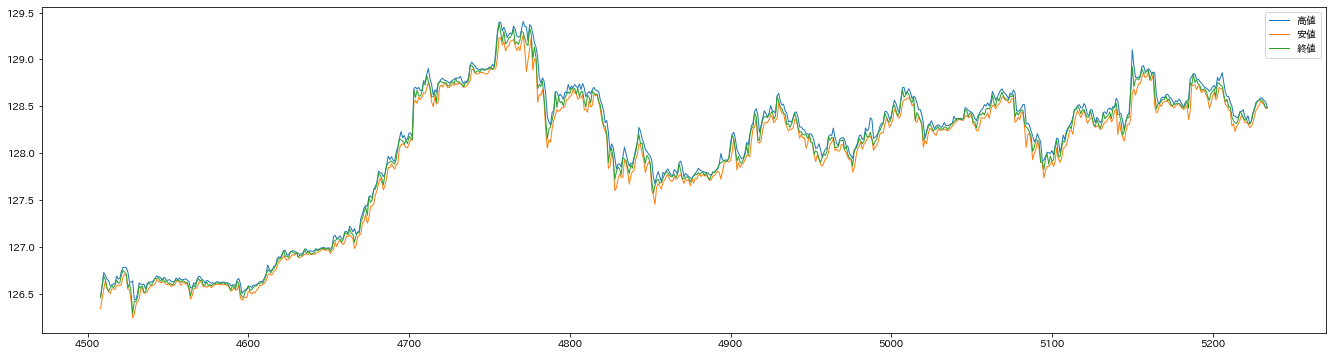

In [38]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_concat['高値'], linewidth=1, label="高値")
plt.pyplot.plot(df_concat['安値'], linewidth=1, label="安値")
plt.pyplot.plot(df_concat['終値'], linewidth=1, label="終値")
plt.pyplot.legend()
plt.pyplot.show()

In [75]:
df_max = df_concat[df_concat['高値']==df_concat['高値'].max()]
max_close_price = df_max['終値'].max()
max_close_price
df_min = df_concat[df_concat['安値']==df_concat['安値'].min()]
min_close_price = df_min['終値'].max()
min_close_price

126.285

In [78]:
#import csv

with open("sample.csv",mode="w",) as f:
    #writer = csv.writer(f)
    #writer.writerow(max_close_price)
    f.write(f"高値,安値\n{max_close_price},{min_close_price}")

In [70]:
with open('sample.csv',mode="r") as f:
    s = f.read()
print(s.split('\n'))

['123,333,555', '345,222', '444,']


In [12]:
df_2 = df_concat
df_2['devi_close_high'] = df_2['高値'] - df_2['終値']
df_2['devi_close_low'] = df_2['終値'] - df_2['安値']
df_2['devi_devi_'] = df_2['devi_close_high'] - df_2['devi_close_low']
df_2['0'] = 0
df_2['trend'] = df_2['終値'] - df_2['終値'].mean()

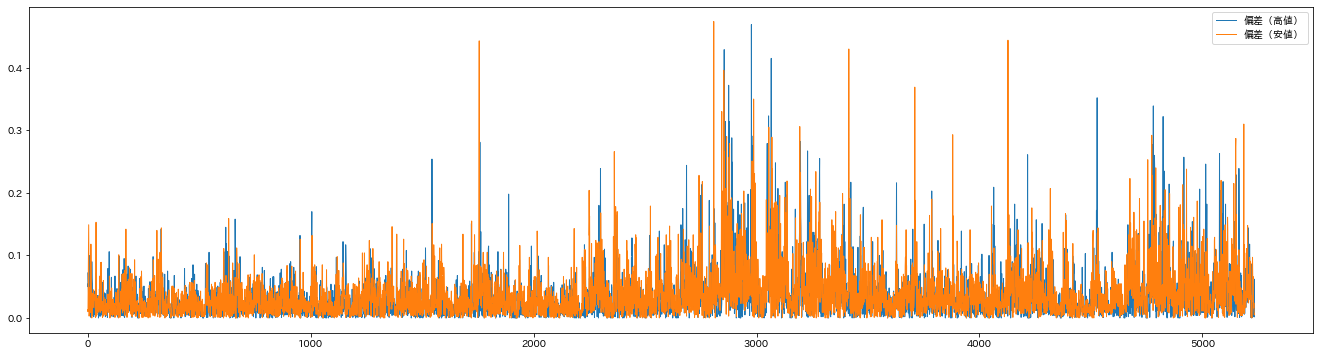

In [13]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_close_high'], linewidth=1, label="偏差（高値）")
plt.pyplot.plot(df_2['devi_close_low'], linewidth=1, label="偏差（安値）")
plt.pyplot.legend()
plt.pyplot.show()

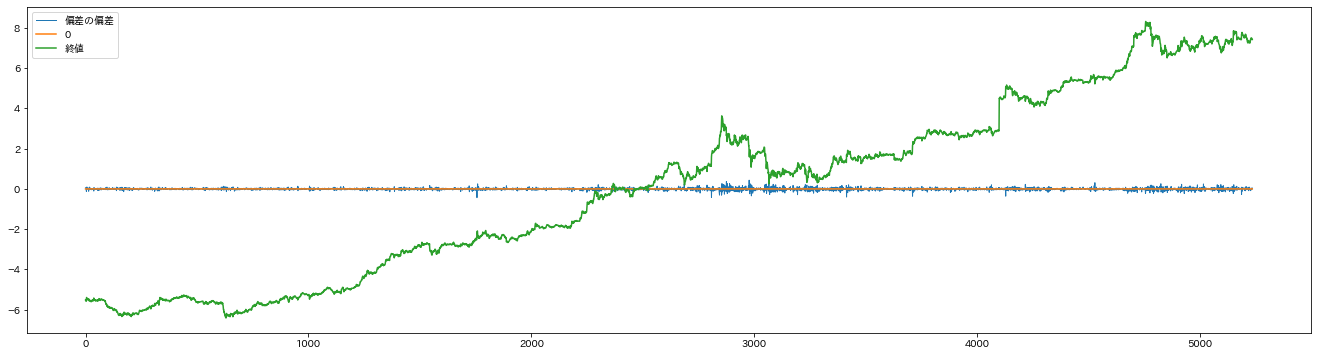

In [14]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_devi_'], linewidth=1, label="偏差の偏差")
plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.legend()
plt.pyplot.show()

In [15]:
df_2['devi_close_high_mean'] = df_2['devi_close_high'].mean()
df_2['devi_close_low_mean'] = df_2['devi_close_low'].mean()

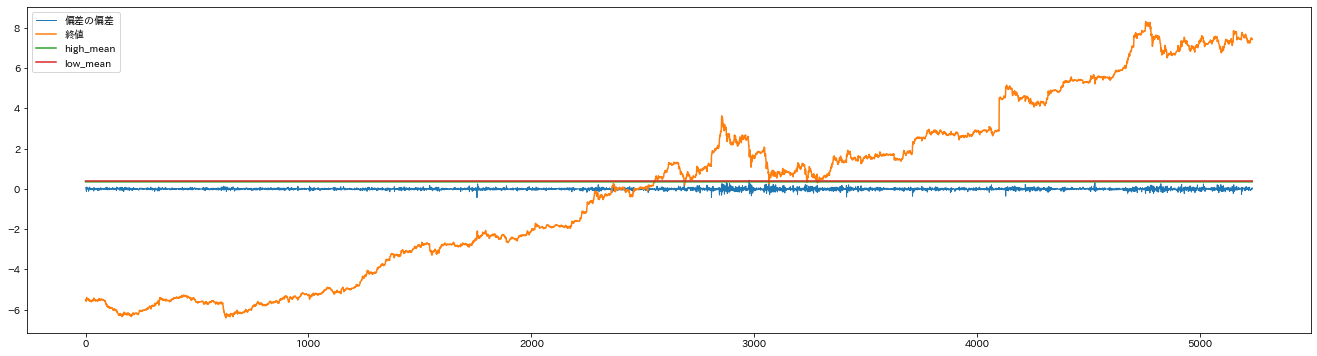

In [16]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['devi_devi_'], linewidth=1, label="偏差の偏差")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['devi_close_high_mean']*10, linewidth=1.5, label="high_mean")
plt.pyplot.plot(df_2['devi_close_low_mean']*10, linewidth=1.5, label="low_mean")
plt.pyplot.legend()
plt.pyplot.show()

In [17]:
df_2['deviation'] = df_2['高値'] - df_2['安値']
df_2['deviation'].mean()

0.07461451766953198

In [18]:
close_price = df_2['終値'].to_list()
check_flg = [0]
for i in range(1,len(close_price)):
    print(close_price[i],close_price[i-1],check_flg[i-1])
    if close_price[i]-0.05 > close_price[i-1]:
        check_flg.append(1)
    elif close_price[i]+0.05 < close_price[i-1]:
        check_flg.append(-1)
    else:
        check_flg.append(0)
df_2['flg'] = check_flg

115.52 115.538 0
115.505 115.52 0
115.48 115.505 0
115.623 115.48 0
115.668 115.623 1
115.604 115.668 0
115.593 115.604 -1
115.582 115.593 0
115.607 115.582 0
115.569 115.607 0
115.591 115.569 0
115.579 115.591 0
115.517 115.579 0
115.571 115.517 -1
115.554 115.571 1
115.58 115.554 0
115.569 115.58 0
115.496 115.569 0
115.531 115.496 -1
115.513 115.531 0
115.503 115.513 0
115.483 115.503 0
115.506 115.483 0
115.481 115.506 0
115.456 115.481 0
115.489 115.456 0
115.476 115.489 0
115.505 115.476 0
115.511 115.505 0
115.544 115.511 0
115.501 115.544 0
115.517 115.501 0
115.533 115.517 0
115.545 115.533 0
115.523 115.545 0
115.506 115.523 0
115.64 115.506 0
115.569 115.64 1
115.548 115.569 -1
115.545 115.548 0
115.524 115.545 0
115.546 115.524 0
115.525 115.546 0
115.538 115.525 0
115.506 115.538 0
115.489 115.506 0
115.517 115.489 0
115.526 115.517 0
115.527 115.526 0
115.535 115.527 0
115.529 115.535 0
115.5 115.529 0
115.498 115.5 0
115.55 115.498 0
115.546 115.55 1
115.495 115.546 0
11

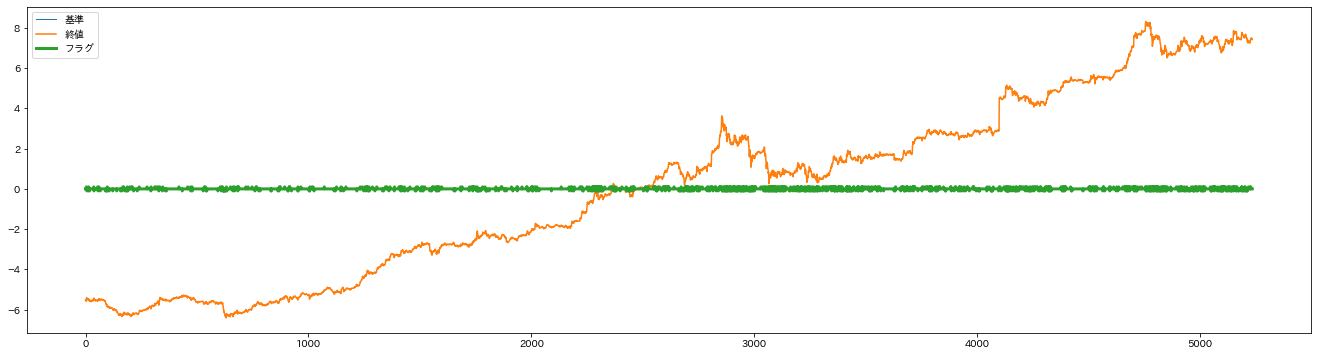

In [19]:
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['0'], linewidth=1, label="基準")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['flg']*0.1, linewidth=3, label="フラグ")
plt.pyplot.legend()
plt.pyplot.show()

In [20]:
cnt = 0
for i in check_flg:
    if i == 1 or i == -1:
        cnt += 1
cnt

1223

In [21]:
high_price = df_2['高値'].to_list()
low_price = df_2['安値'].to_list()
counter,score,check,score2 = 0,0,0,0
counter_list = [0] * len(df_2)
check_list = [0] * len(df_2)
score_list = [0] * len(df_2)
check_flg2 = [0] * len(check_flg)       
num_1 = 0.1
num_2 = 0.1
for index,value in enumerate(check_flg):
    if value == 1:
        check += 1
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        counter2 = 0
        for i in range(index+1,len(df_2)):
            counter2 += 1
            if counter2 > 6:
                break
            if high_price[i] >= close_price[index]+num_1:
                counter += 1
                score += 1
                break
            elif low_price[i] <= close_price[index]-num_2:
                counter += 1
                score += -1
                break
    elif value == -1:
        check += 1
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        counter2 = 0
        for i in range(index+1,len(df_2)):
            counter2 += 1
            if counter2 > 6:
                break
            if high_price[i] >= close_price[index]+num_1:
                counter += 1
                score2 += -1
                break
            elif low_price[i] <= close_price[index]-num_2:
                counter += 1
                score2 += +1
                break
    else:
        check_list[index] = check
        counter_list[index] = counter
        score_list[index] = score
        continue
print(counter,score,score2,check) # counter=決済,check=新規注文,15

985 45 -60 1223


985 45 -60 1223


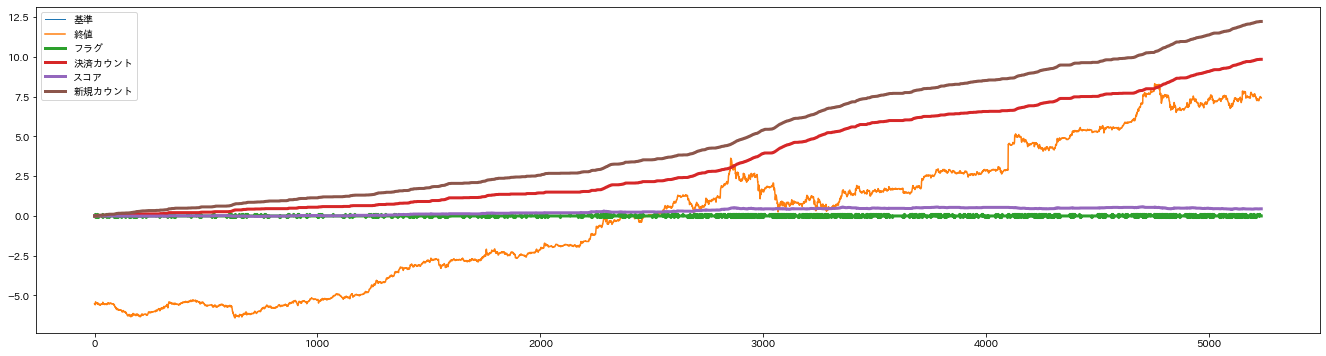

In [22]:
df_2['counter'] = counter_list
df_2 ['score'] = score_list
df_2['check'] = check_list
df_2['flg'] = check_flg
print(counter,score,score2,check) # counter=決済,check=新規注文,15
plt.pyplot.figure(figsize=(23,6))
plt.pyplot.plot(df_2['0'], linewidth=1, label="基準")
#plt.pyplot.plot(df_2['0'], linewidth=1.5, label="0")
plt.pyplot.plot(df_2['trend'], linewidth=1.5, label="終値")
plt.pyplot.plot(df_2['flg']*0.1, linewidth=3, label="フラグ")
plt.pyplot.plot(df_2['counter']*0.01, linewidth=3, label="決済カウント")
plt.pyplot.plot(df_2['score']*0.01, linewidth=3, label="スコア")
plt.pyplot.plot(df_2['check']*0.01, linewidth=3, label="新規カウント")
plt.pyplot.legend()
plt.pyplot.show()

In [94]:
score_list


[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,